# Training Analysis 2 classes

In [2]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
# helper functions for the plots

def plot_fold_histories(path_to_train_history):
    # Define the base path to your training history files
    base_path_to_train_history = path_to_train_history

    # Create a figure for plotting all folds
    fig, axes = plt.subplots(3, 2, figsize=(15, 10)) # To visualize both loss and accuracy
    axes = axes.ravel()

    alpha_all = 0.3
    alpha_avg = 0.7

    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']

    loss_list = []
    val_loss_list = []
    accuracy_list = []
    val_accuracy_list = []
    loss_diff_list = []
    accuracy_diff_list = []

    # Loop through each fold and load the training history
    for fold in range(10):
        # Construct the path for the current fold
        path_to_train_history = base_path_to_train_history + f"{fold}.npy"

        # Load the training history
        history = np.load(path_to_train_history, allow_pickle=True).item()
        
        # Plot the loss and accuracy for the current fold
        history_df = pd.DataFrame(history)

        history_df["loss_diff"] = history_df["loss"] - history_df["val_loss"]
        history_df["accuracy_diff"] = history_df["accuracy"] - history_df["val_accuracy"]

        loss_list.append(history_df["loss"])
        val_loss_list.append(history_df["val_loss"])
        accuracy_list.append(history_df["accuracy"])
        val_accuracy_list.append(history_df["val_accuracy"])
        loss_diff_list.append(history_df["loss_diff"])
        accuracy_diff_list.append(history_df["accuracy_diff"])

        # Plot training and validation loss
        history_df[['loss']].plot(ax=axes[0], color=colors[fold], legend=False, alpha=alpha_all)
        axes[0].set_title('Training Loss (All Folds & Average)')
        axes[0].set_xlabel('Epochs')
        axes[0].set_ylabel('Loss')
        axes[0].grid(True)

        # Plot training and validation accuracy
        history_df[['accuracy']].plot(ax=axes[1], color=colors[fold], legend=False, alpha=alpha_all)
        axes[1].set_title('Training Accuracy (All Folds & Average)')
        axes[1].set_xlabel('Epochs')
        axes[1].set_ylabel('Accuracy')
        axes[1].grid(True)

        history_df[["val_loss"]].plot(ax=axes[2], color=colors[fold], legend=False, alpha=alpha_all)
        axes[2].set_title('Validation Loss (All Folds & Average)')
        axes[2].set_xlabel('Epochs')
        axes[2].set_ylabel('Val Loss')
        axes[2].grid(True)

        history_df[["val_accuracy"]].plot(ax=axes[3], color=colors[fold], legend=False, alpha=alpha_all)
        axes[3].set_title('Validation Accuracy (All Folds & Average)')
        axes[3].set_xlabel('Epochs')
        axes[3].set_ylabel('Val Accuracy')
        axes[3].grid(True)

        history_df[["loss_diff"]].plot(ax=axes[4], color=colors[fold], legend=False, alpha=alpha_all)
        axes[4].set_title('Loss Difference between Training and Validation (All Folds & Average)')
        axes[4].set_xlabel('Epochs')
        axes[4].set_ylabel('Loss Difference')
        axes[4].grid(True)

        history_df[["accuracy_diff"]].plot(ax=axes[5], color=colors[fold], legend=False, alpha=alpha_all)
        axes[5].set_title('Accuracy Difference between Training and Validation (All Folds & Average)')
        axes[5].set_xlabel('Epochs')
        axes[5].set_ylabel('Accuracy Difference')
        axes[5].grid(True)

    # Add a legend for clarity (for different folds)
    for i in range(6):
        axes[i].legend([f'Fold {i+1}' for i in range(10)], loc='upper right', fontsize='small')

    # Calculate average metrics across all folds
    avg_loss = pd.concat(loss_list, axis=1).mean(axis=1)
    avg_val_loss = pd.concat(val_loss_list, axis=1).mean(axis=1)
    avg_accuracy = pd.concat(accuracy_list, axis=1).mean(axis=1)
    avg_val_accuracy = pd.concat(val_accuracy_list, axis=1).mean(axis=1)
    avg_loss_diff = pd.concat(loss_diff_list, axis=1).mean(axis=1)
    avg_accuracy_diff = pd.concat(accuracy_diff_list, axis=1).mean(axis=1)

    avg_loss.plot(ax=axes[0], color='black', linestyle='-', label='Average Loss')
    avg_val_loss.plot(ax=axes[2], color='black', linestyle='-', label='Average Val Loss')

    avg_accuracy.plot(ax=axes[1], color='black', linestyle='-', label='Average Accuracy')
    avg_val_accuracy.plot(ax=axes[3], color='black', linestyle='-', label='Average Val Accuracy')

    avg_loss_diff.plot(ax=axes[4], color='black', linestyle='-', label='Average Loss Diff')
    avg_accuracy_diff.plot(ax=axes[5], color='black', linestyle='-', label='Average Accuracy Diff')

    plt.tight_layout()
    plt.show()

def plot_lr_history(path_to_train_history):

    path_to_train_history = path_to_train_history

    history = np.load(path_to_train_history, allow_pickle=True).item()

    plt.semilogx(history["lr"], history["loss"])
    plt.title("loss vs. learning rate")
    plt.axis([1e-8, 1e-1, 0, 3])

    print(len(history["loss"]))

## Only images
The only input the ai will get is an image of the metastases, without any other further information.

### slices containing metastases
here the image input is a slice of the mri, which thus contains both the metastasis as well as surrounding healthy brain tissue. The image might also contain parts of other metastases if they're also part of the slice.

#### with brightness / contrast DA
the data-augmentation (DA) here contains a brightness and contrast adjustment

##### from scratch

##### pretrained

#### without brightness / contrast DA
the data-augmentation (DA) here does not(!) contain a brightness and contrast adjustment

##### from scratch

##### pretrained

### cutout metastases
here the image containts only the metastasis, no surrounding healthy brain tissue can be seen. There also won't be any other metastases in the image.

#### with brightness / contrast DA
the data-augmentation (DA) here contains a brightness and contrast adjustment

##### from scratch

##### pretrained

#### without brightness / contrast DA
the data-augmentation (DA) here does not(!) contain a brightness and contrast adjustment

##### from scratch

##### pretrained

## Images + Clinical Data
The input will contain both the image of the metastases (as above) as well as the age and sex of each patient

### slices containing metastases
here the image input is a slice of the mri, which thus contains both the metastasis as well as surrounding healthy brain tissue. The image might also contain parts of other metastases if they're also part of the slice.

#### with brightness / contrast DA
the data-augmentation (DA) here contains a brightness and contrast adjustment

##### from scratch

##### pretrained

#### without brightness / contrast DA
the data-augmentation (DA) here does not(!) contain a brightness and contrast adjustment

##### from scratch

##### pretrained

### cutout metastases
here the image containts only the metastasis, no surrounding healthy brain tissue can be seen. There also won't be any other metastases in the image.

#### with brightness / contrast DA
the data-augmentation (DA) here contains a brightness and contrast adjustment

##### from scratch

Conv

400


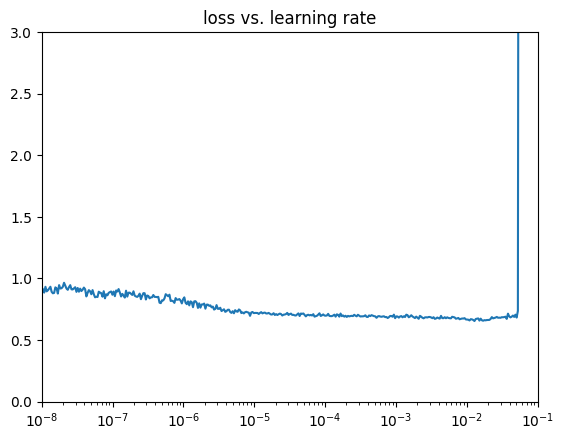

In [40]:
path_to_conv_lr_history = "/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/conv/conv_01_lr_2_cls_gray_run_2024_10_17_17_49_51/history_conv_01_lr_2_cls_gray.npy"

plot_lr_history(path_to_conv_lr_history)

based on this graph, I'll pick a learning rate of 10^-2\
this was apparently too high, so I changed it to 10^-3

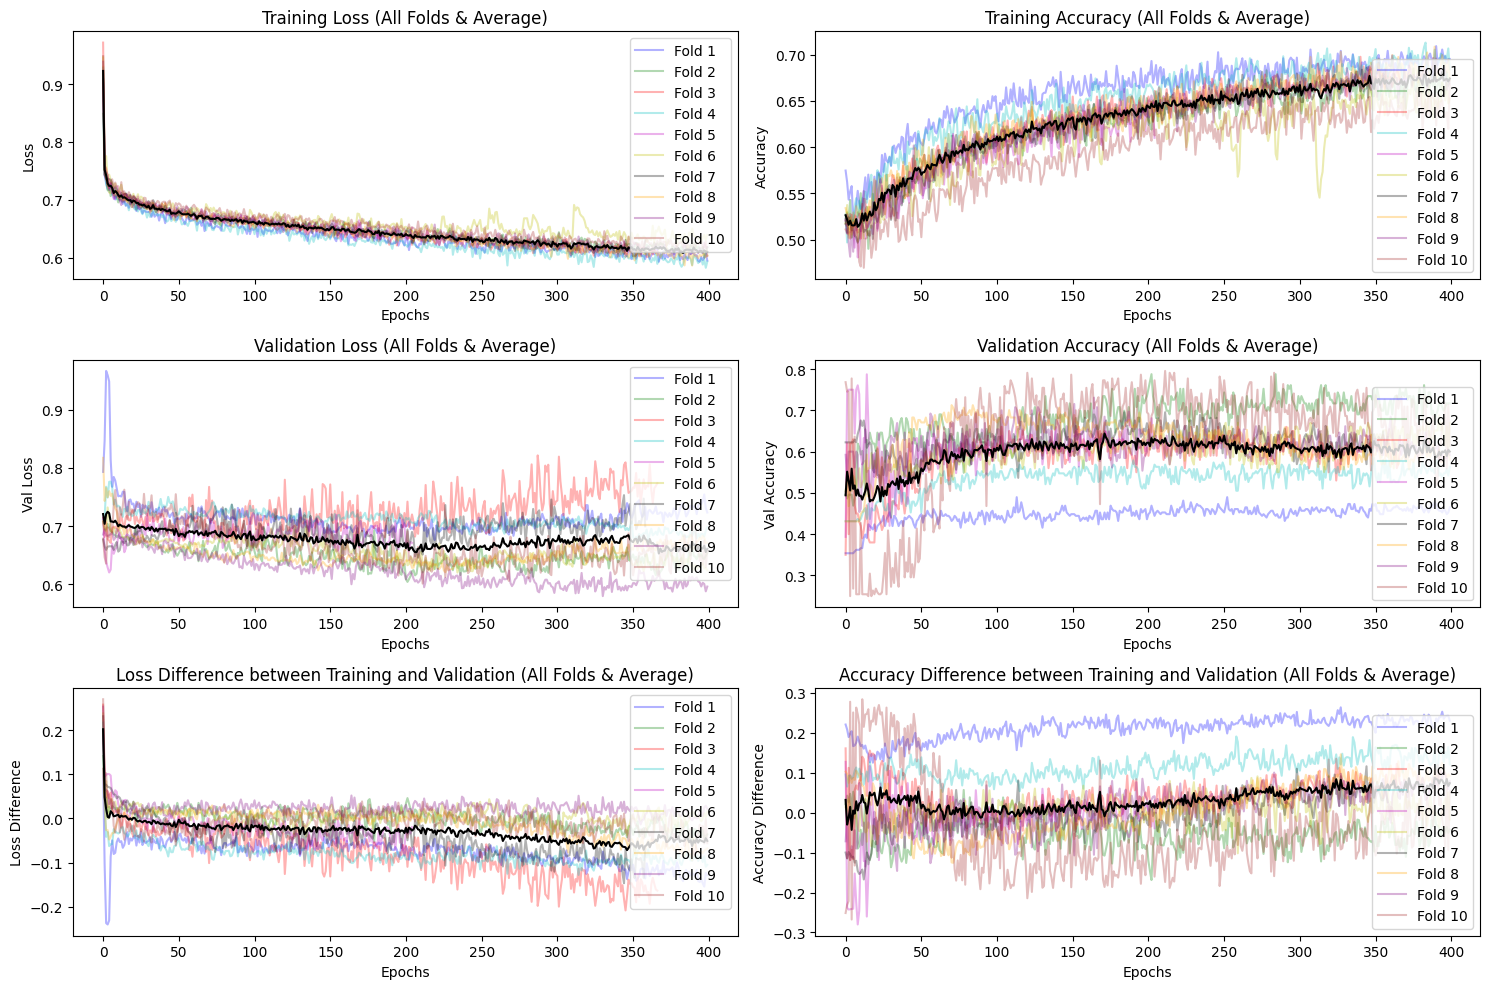

In [39]:
path_to_conv_train_history = "/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/conv/conv_01_2_cls_cutout_gray_kfold_run_2024_10_20_19_58_25/history_conv_01_2_cls_cutout_gray_kfold_fold_"

plot_fold_histories(path_to_conv_train_history)

ResNet34

400


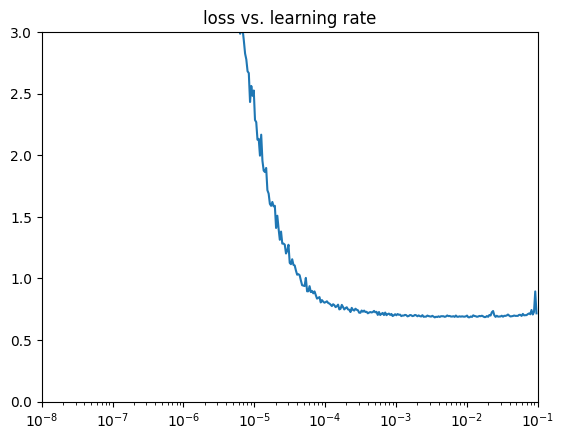

In [41]:
path_to_resnet34_lr_history = "/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/ResNet34/resnet34_01_2_classes_run_2024_10_13_17_04_17/history.npy"

plot_lr_history(path_to_resnet34_lr_history)

based on this graph, I'll pick a learning rate of 10^-2\
this was apparently too high, so I changed it to 10^-3

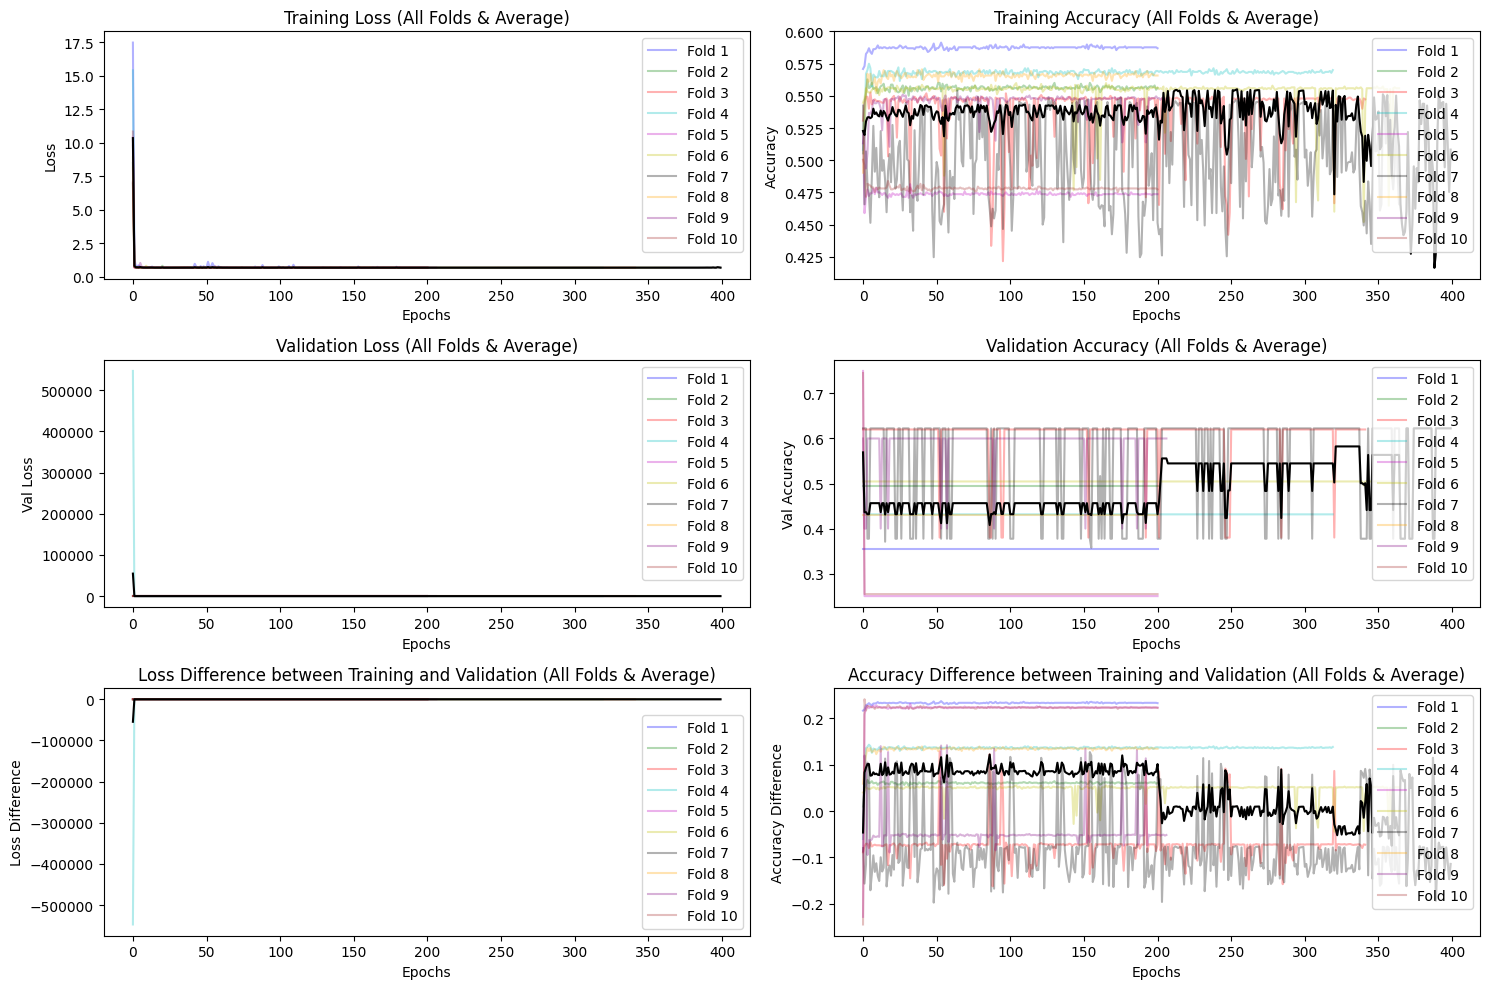

In [42]:
path_to_resnet34_train_history = "/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/ResNet34/resnet34_01_2_cls_cutout_gray_kfold_run_2024_10_21_03_01_55/history_resnet34_01_2_cls_cutout_gray_kfold_fold_"

plot_fold_histories(path_to_resnet34_train_history)

ResNet152

400


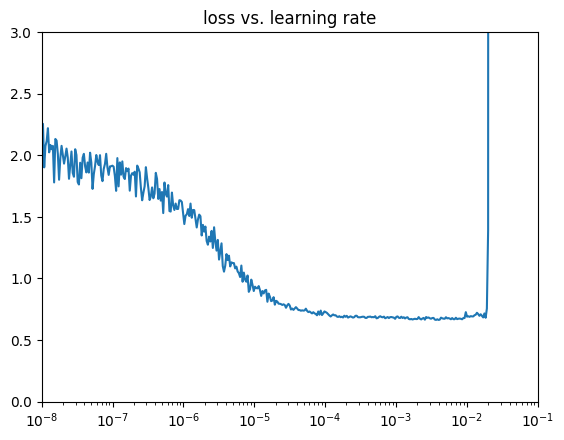

In [33]:
path_to_lr_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/ResNet152/resnet152_01_lr_2_cls_gray_run_2024_10_18_08_22_57/history_resnet152_01_lr_2_cls_gray.npy")

history = np.load(path_to_lr_history, allow_pickle=True).item()

plt.semilogx(history["lr"], history["loss"])
plt.title("loss vs. learning rate")
plt.axis([1e-8, 1e-1, 0, 3])

print(len(history["loss"]))

based on this graph, I'll pick a learning rate of 10^-2

ResNext50

400


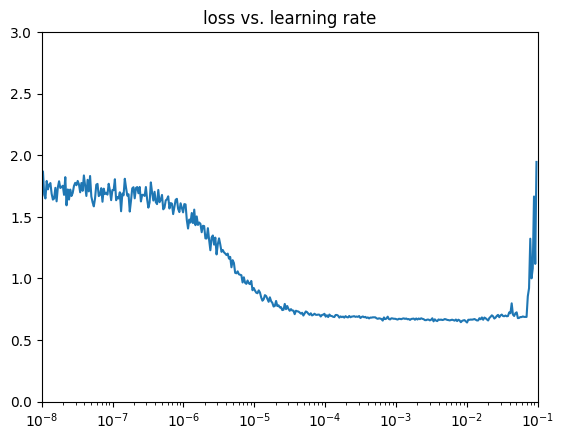

In [12]:
path_to_lr_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/ResNeXt50/resnext50_01_lr_2_cls_gray_run_2024_10_18_13_42_10/history_resnext50_01_lr_2_cls_gray.npy")

history = np.load(path_to_lr_history, allow_pickle=True).item()

plt.semilogx(history["lr"], history["loss"])
plt.title("loss vs. learning rate")
plt.axis([1e-8, 1e-1, 0, 3])

print(len(history["loss"]))

based on this graph, I'll pick a learning rate of 10^-2

ResNext101

400


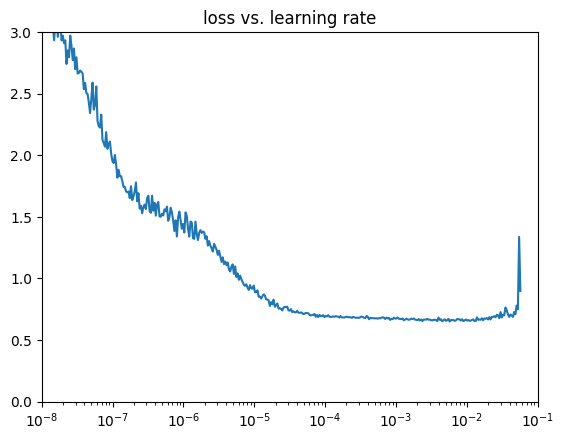

In [13]:
path_to_lr_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/ResNeXt101/resnext101_01_lr_2_cls_gray_run_2024_10_18_14_26_18/history_resnext101_01_lr_2_cls_gray.npy")

history = np.load(path_to_lr_history, allow_pickle=True).item()

plt.semilogx(history["lr"], history["loss"])
plt.title("loss vs. learning rate")
plt.axis([1e-8, 1e-1, 0, 3])

print(len(history["loss"]))

based on this graph, I'll pick a learning rate of 10^-2

##### pretrained

#### without brightness / contrast DA
the data-augmentation (DA) here does not(!) contain a brightness and contrast adjustment

##### from scratch

##### pretrained

## From Scratch

### Regular CNN

#### 4 classes

##### Learning Rate

In [6]:
path_to_lr_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/numpy_histories/cutout/conv/history_00.npy")

history = np.load(path_to_lr_history, allow_pickle=True).item()

plt.semilogx(history["lr"], history["loss"])
plt.title("loss vs. learning rate")
plt.axis([1e-8, 1e-1, 1, 3])

FileNotFoundError: [Errno 2] No such file or directory: '/Users/LennartPhilipp/Desktop/Uni/Prowiss/numpy_histories/cutout/conv/history_00.npy'

While this graph isn't perfect, we can see that the loss gradually becomes less when the the learning rate is increased until roughly 10^-5. For the training I then used a lerning rate of 10^-6.

Note: I'll test once more time with 10^-3 (10.08.2024)

##### Training results

dict_keys(['loss', 'root_mean_squared_error', 'accuracy', 'val_loss', 'val_root_mean_squared_error', 'val_accuracy'])


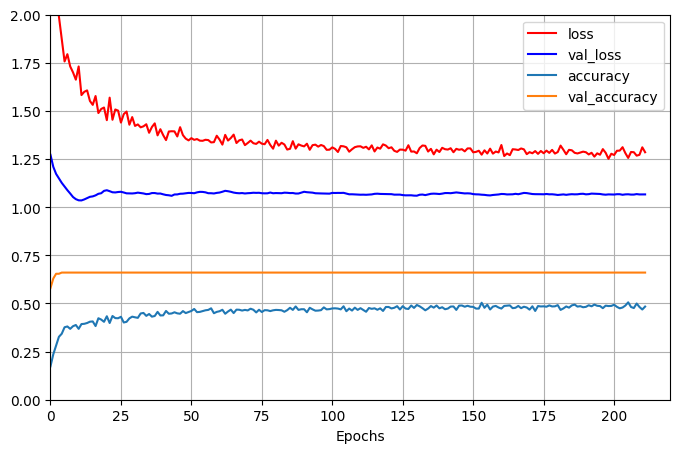

In [27]:
path_to_train_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/conv/convlr00_4_classes_run_2024_08_07_20_42_08/history.npy")

history = np.load(path_to_train_history, allow_pickle=True).item()

print(history.keys())

pd.DataFrame(history)[["loss","val_loss", "accuracy","val_accuracy"]].plot(figsize=(8,5),
                           xlim=(0,220),
                           ylim=(0,2),
                           grid=True,
                           xlabel="Epochs",
                           style=["r-","b-"],)
plt.show()

dict_keys(['loss', 'root_mean_squared_error', 'accuracy', 'val_loss', 'val_root_mean_squared_error', 'val_accuracy'])


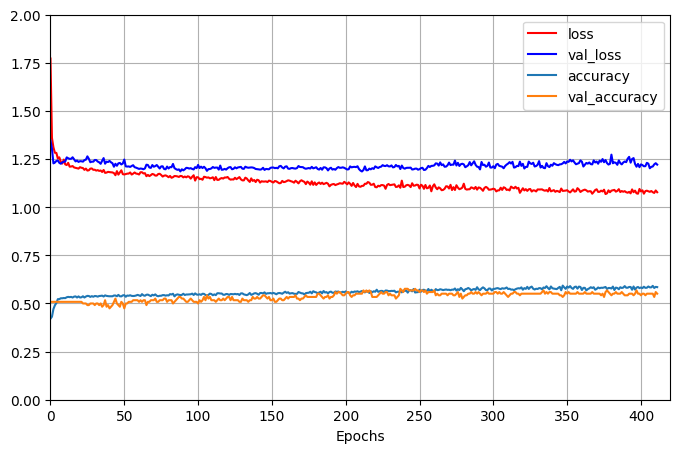

In [30]:
path_to_lr_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/conv/conv_00_4_classes_run_2024_08_10_20_49_40/history.npy")

history = np.load(path_to_lr_history, allow_pickle=True).item()

print(history.keys())

pd.DataFrame(history)[["loss","val_loss", "accuracy","val_accuracy"]].plot(figsize=(8,5),
                           xlim=(0,420), #nice
                           ylim=(0,2),
                           grid=True,
                           xlabel="Epochs",
                           style=["r-","b-"],)
plt.show()

### ResNet34 architecture

400


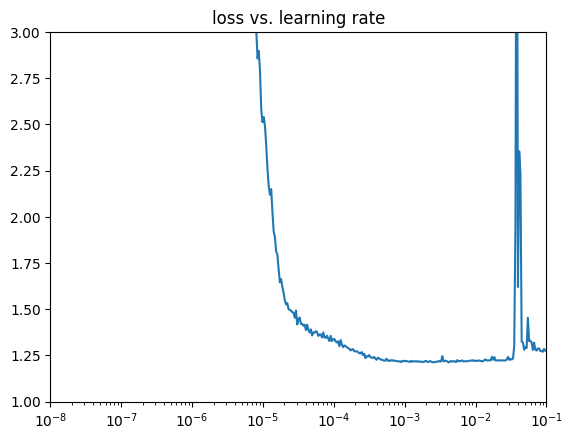

In [10]:
path_to_lr_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/Resnet34/resnet34lr00_4_classes_run_2024_08_07_21_03_41/history.npy")

history = np.load(path_to_lr_history, allow_pickle=True).item()

plt.semilogx(history["lr"], history["loss"])
plt.title("loss vs. learning rate")
plt.axis([1e-8, 1e-1, 1, 3])

print(len(history["loss"]))

I guess I'll be using a learning rate of roughly 10^-4

Note: one more time with 10^-3

##### Learning rate 10^-4

dict_keys(['loss', 'root_mean_squared_error', 'accuracy', 'val_loss', 'val_root_mean_squared_error', 'val_accuracy'])


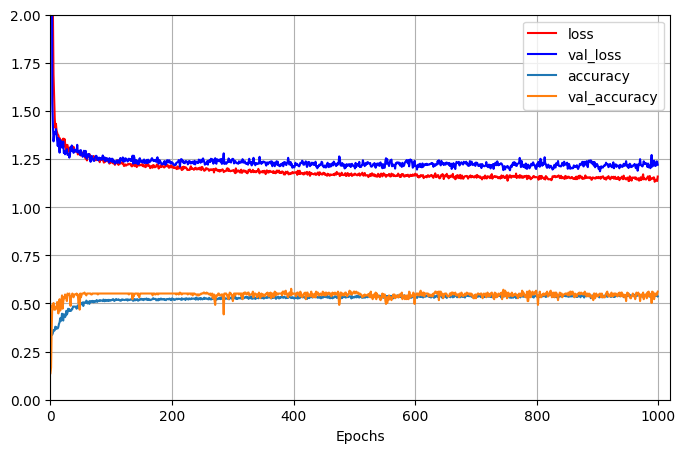

In [33]:
path_to_train_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/Resnet34/resnet34lr00_4_classes_run_2024_08_09_08_00_42/history.npy")

history = np.load(path_to_train_history, allow_pickle=True).item()

print(history.keys())

pd.DataFrame(history)[["loss","val_loss", "accuracy","val_accuracy"]].plot(figsize=(8,5),
                           xlim=(0,1020),
                           ylim=(0,2),
                           grid=True,
                           xlabel="Epochs",
                           style=["r-","b-"],)
plt.show()

##### Learning rate 10^-3

dict_keys(['loss', 'root_mean_squared_error', 'accuracy', 'val_loss', 'val_root_mean_squared_error', 'val_accuracy'])


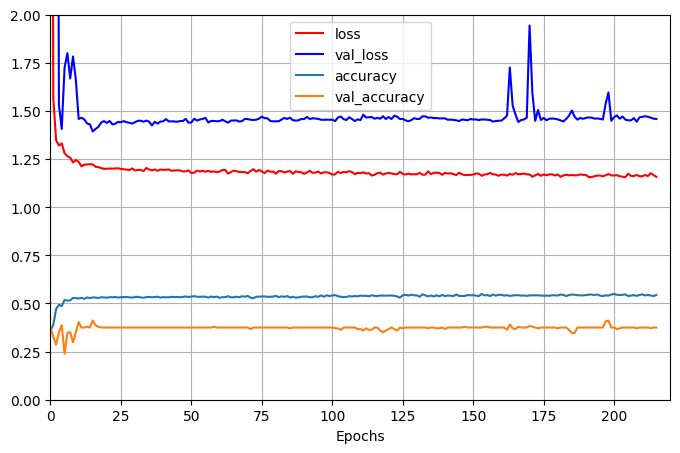

In [32]:
path_to_train_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/ResNet34/resnet34_01_4_classes_run_2024_08_10_21_34_49/history.npy")

history = np.load(path_to_train_history, allow_pickle=True).item()

print(history.keys())

pd.DataFrame(history)[["loss","val_loss", "accuracy","val_accuracy"]].plot(figsize=(8,5),
                           xlim=(0,220),
                           ylim=(0,2),
                           grid=True,
                           xlabel="Epochs",
                           style=["r-","b-"],)
plt.show()

yeah that doesn't look that good, the learning rate of 10^-4 seemed to be better suited tbh

### Resnet152 architecture

(1e-08, 0.1, 1.0, 3.0)

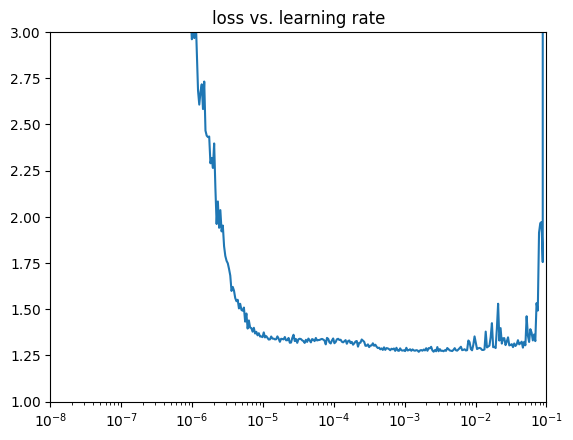

In [13]:
path_to_lr_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/Resnet152/resnet152lr00_4_classes_run_2024_08_09_20_14_37/history.npy")

history = np.load(path_to_lr_history, allow_pickle=True).item()

plt.semilogx(history["lr"], history["loss"])
plt.title("loss vs. learning rate")
plt.axis([1e-8, 1e-1, 1, 3])

I chose 10^-3

dict_keys(['loss', 'root_mean_squared_error', 'accuracy', 'val_loss', 'val_root_mean_squared_error', 'val_accuracy'])


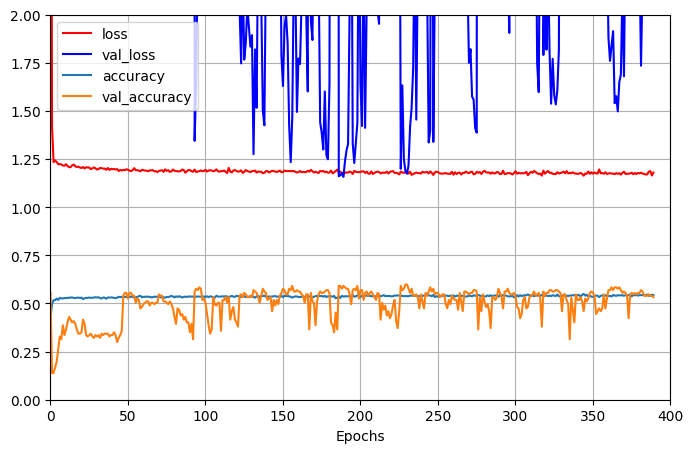

In [5]:
path_to_train_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/ResNet152/resnet152_00_4_classes_run_2024_08_10_22_15_17/history.npy")

history = np.load(path_to_train_history, allow_pickle=True).item()

print(history.keys())

pd.DataFrame(history)[["loss","val_loss", "accuracy","val_accuracy"]].plot(figsize=(8,5),
                           xlim=(0,400),
                           ylim=(0,2),
                           grid=True,
                           xlabel="Epochs",
                           style=["r-","b-"],)
plt.show()

okay, this doesn't look great, maybe try a smaller learning rate...? So 10^-4 next time?

dict_keys(['loss', 'root_mean_squared_error', 'accuracy', 'val_loss', 'val_root_mean_squared_error', 'val_accuracy'])


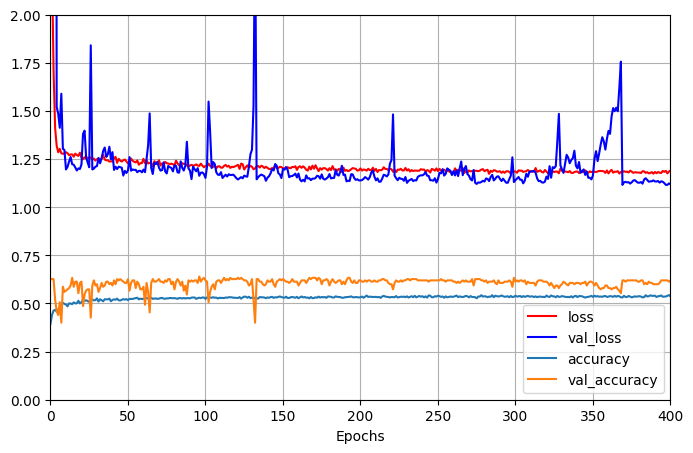

In [5]:
path_to_train_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/ResNet152/resnet152_00_4_classes_run_2024_08_12_07_10_22/history.npy")

history = np.load(path_to_train_history, allow_pickle=True).item()

print(history.keys())

pd.DataFrame(history)[["loss","val_loss", "accuracy","val_accuracy"]].plot(figsize=(8,5),
                           xlim=(0,400),
                           ylim=(0,2),
                           grid=True,
                           xlabel="Epochs",
                           style=["r-","b-"],)
plt.show()

### ResNeXt50 architecture

(1e-08, 0.1, 1.0, 3.0)

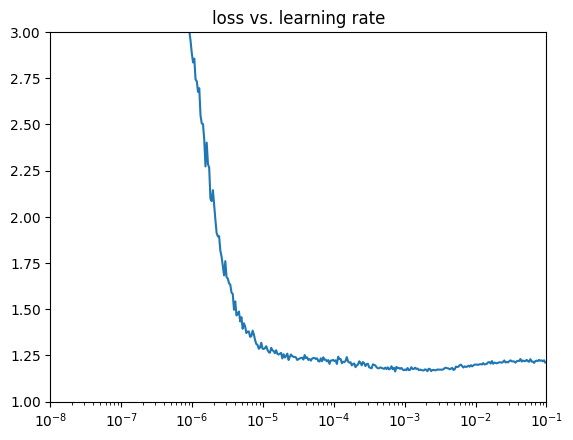

In [43]:
path_to_lr_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/ResNeXt50/resnext50lr00_4_classes_run_2024_08_11_03_54_37/history.npy")

history = np.load(path_to_lr_history, allow_pickle=True).item()

plt.semilogx(history["lr"], history["loss"])
plt.title("loss vs. learning rate")
plt.axis([1e-8, 1e-1, 1, 3])

So I guess I'll try out 10^-3...?

dict_keys(['loss', 'root_mean_squared_error', 'accuracy', 'val_loss', 'val_root_mean_squared_error', 'val_accuracy'])


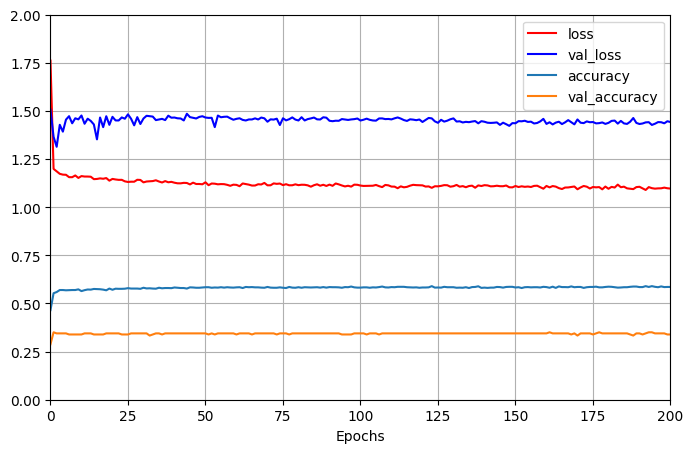

In [7]:
path_to_train_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/ResNeXt50/resnext50_00_4_classes_run_2024_08_11_22_20_02/history.npy")

history = np.load(path_to_train_history, allow_pickle=True).item()

print(history.keys())

pd.DataFrame(history)[["loss","val_loss", "accuracy","val_accuracy"]].plot(figsize=(8,5),
                           xlim=(0,200),
                           ylim=(0,2),
                           grid=True,
                           xlabel="Epochs",
                           style=["r-","b-"],)
plt.show()

here as well, maybe I'll go for the smaller learning rate. Might also be an inbalanced training set

### ResNeXt101 architecture

(1e-08, 0.1, 1.0, 3.0)

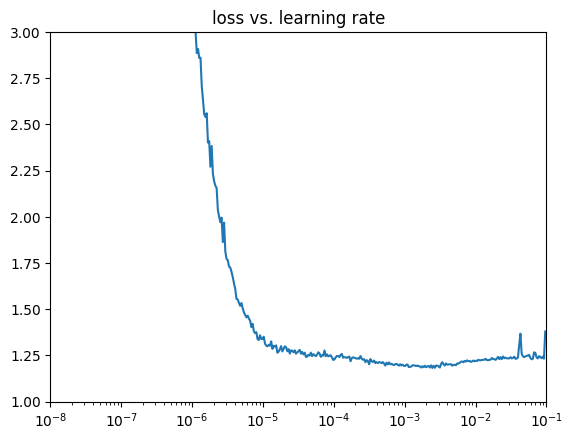

In [9]:
path_to_lr_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/ResNeXt101/resnext101lr00_4_classes_run_2024_08_11_04_39_44/history.npy")

history = np.load(path_to_lr_history, allow_pickle=True).item()

plt.semilogx(history["lr"], history["loss"])
plt.title("loss vs. learning rate")
plt.axis([1e-8, 1e-1, 1, 3])

And here I'll go for 10^-3 as well

dict_keys(['loss', 'root_mean_squared_error', 'accuracy', 'val_loss', 'val_root_mean_squared_error', 'val_accuracy'])


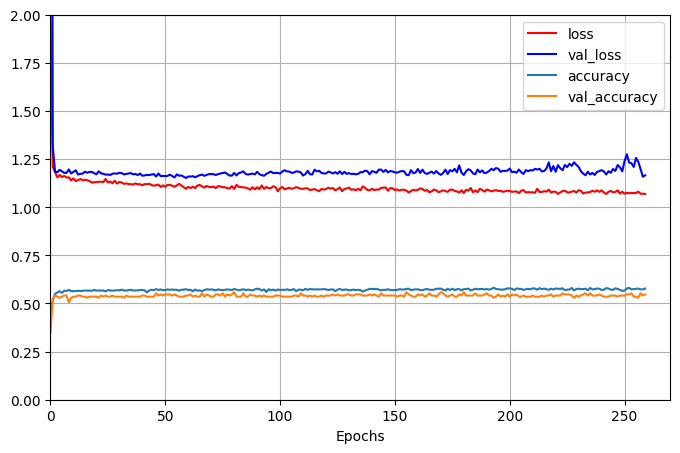

In [12]:
path_to_train_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/ResNeXt101/resnext101_00_4_classes_run_2024_08_11_22_43_50/history.npy")

history = np.load(path_to_train_history, allow_pickle=True).item()

print(history.keys())

pd.DataFrame(history)[["loss","val_loss", "accuracy","val_accuracy"]].plot(figsize=(8,5),
                           xlim=(0,270),
                           ylim=(0,2),
                           grid=True,
                           xlabel="Epochs",
                           style=["r-","b-"],)
plt.show()

## Pre Trained

### Inceptionv3

(1e-08, 0.1, 1.0, 3.0)

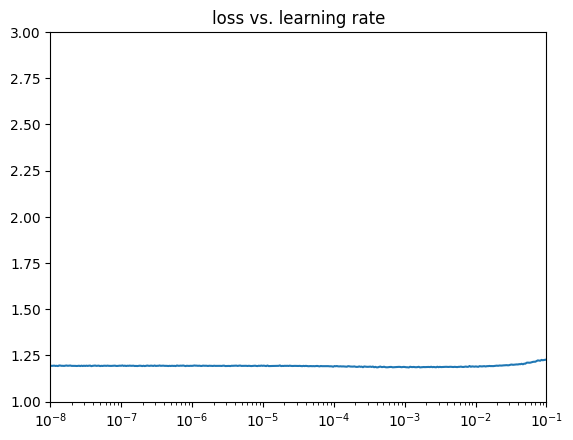

In [16]:
path_to_lr_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/transfer_Inceptionv3/transfer_inceptionv3_upperlayer00_4_classes_run_2024_08_11_23_29_17/history.npy")

history = np.load(path_to_lr_history, allow_pickle=True).item()

plt.semilogx(history["lr"], history["loss"])
plt.title("loss vs. learning rate")
plt.axis([1e-8, 1e-1, 1, 3])

okay, this is not necessarily what I've expected, but I'll guess we'll take 10^-3 then

dict_keys(['loss', 'root_mean_squared_error', 'accuracy', 'val_loss', 'val_root_mean_squared_error', 'val_accuracy'])


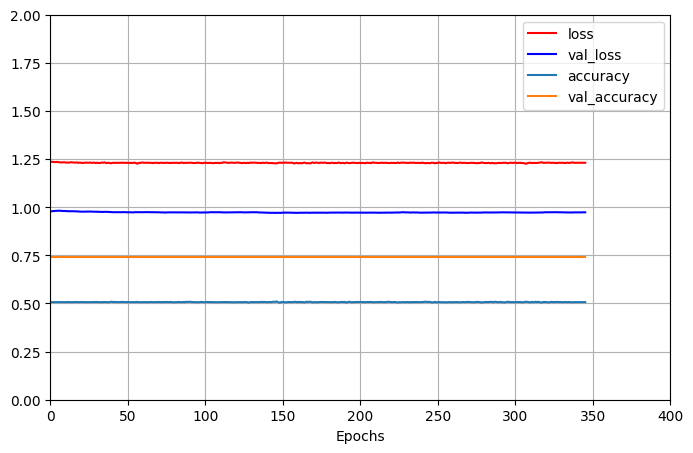

In [4]:
path_to_train_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/transfer_Inceptionv3/transfer_inceptionv3_00_4_classes_run_2024_08_12_18_11_33/history.npy")

history = np.load(path_to_train_history, allow_pickle=True).item()

print(history.keys())

pd.DataFrame(history)[["loss","val_loss", "accuracy","val_accuracy"]].plot(figsize=(8,5),
                           xlim=(0,400),
                           ylim=(0,2),
                           grid=True,
                           xlabel="Epochs",
                           style=["r-","b-"],)
plt.show()

what?! what's going on?

### ResNet50v2

(1e-08, 0.1, 1.0, 5.0)

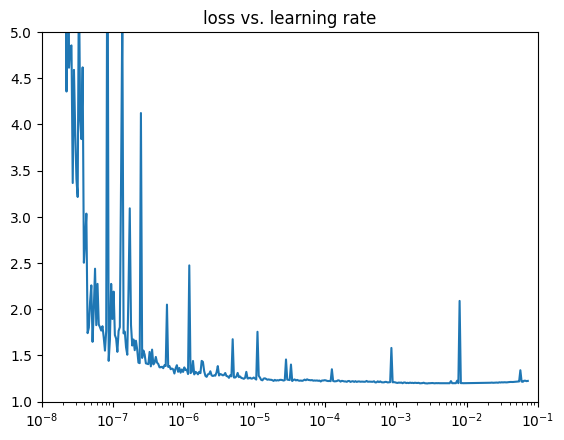

In [17]:
path_to_lr_history = Path("/Users/LennartPhilipp/Desktop/Uni/Prowiss/training_histories/cutout/transfer_ResNet50v2/transfer_resnet50v2_upperlayer00_4_classes_run_2024_08_12_01_13_28/history.npy")

history = np.load(path_to_lr_history, allow_pickle=True).item()

plt.semilogx(history["lr"], history["loss"])
plt.title("loss vs. learning rate")
plt.axis([1e-8, 1e-1, 1, 5])

and this also looks kinda weird, but I'll gues I'll go for 5x10^-2